In [ ]:
def graph_return_ratio_over_time():
    

In [29]:
import multi_armed_bandit as mab
import random as r
import numpy as np

money_total = 1000
max_turns = 10000

number_machines = mab.get_num_slot_machines()
machines = [[i, 0, 0, 0] for i in range(number_machines)] #[machine_no, num_pulls, avg_return_ratio, varience
total_rot = []
turn_rot = []

def bet(money_total, turn, machine):
    return 10

def E(money_total, turn):
    return .05

def use_machine(num, machines, total_rot, turn_rot, money_total):
    
    b = bet(money_total, i, machines[0]) #figure out how much money to wager
    ret = mab.use_machine(machines[0][0], b) #make the wager
    machines[num][1] += 1 #update pulls
    ratio = ret / float(b)
    machines[num][2] = (machines[num][2] * (machines[num][1] - 1) + ratio) / (machines[num][1]) #update avg ratio
    machines[num][3] = (machines[num][3] * (machines[num][1] - 1) + ((ratio - machines[num][2]) ** 2)) / (machines[num][1]) #update varience
    new_money_total = money_total + ret - b
    total_rot.append(new_money_total / float(money_total)) #keep track of gain ratio over time
    turn_rot.append(ratio)
    return new_money_total

for i in range(max_turns):
    #sort the list of machines
    machines = sorted(machines, key=lambda m: m[2], reverse=True)
    if r.random() > E(money_total, i): #choose the best known option
        money_total = use_machine(0, machines, total_rot, turn_rot, money_total)
    else: #choose a random option
        money_total = use_machine(r.randint(0, number_machines - 1), machines, total_rot, turn_rot, money_total)
        

/home/steich/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/steich/.local/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


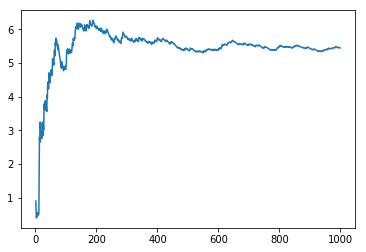

In [33]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

avg_total_rot = [np.average(total_rot[0:i]) for i in range(len(total_rot))]
avg_turn_rot = [np.average(turn_rot[0:i]) for i in range(len(turn_rot))]
plt.plot(range(1000), avg_turn_rot[0:1000])

In [17]:
machines

[[7, 9228, 5.896792371044676, 75.88190858701637],
 [9, 60, 5.721666666666668, 71.75195612059007],
 [3, 60, 5.611666666666667, 67.72508880737728],
 [1, 47, 5.387234042553191, 72.60641694687408],
 [5, 53, 5.266037735849055, 56.99492034428298],
 [4, 56, 4.573214285714284, 51.41280446577863],
 [10, 44, 4.545454545454546, 69.90916051479938],
 [2, 49, 4.538775510204081, 81.52307902326466],
 [8, 62, 3.8419354838709676, 42.700457818335465],
 [0, 106, 2.6518867924528298, 32.785671720644515],
 [6, 235, 2.463829787234043, 10.002702076523423]]

In [34]:
money_total

499660